<div style="background-color: #f0f7ff; border-left: 6px solid #2980b9; padding: 24px; margin-bottom: 32px; border-radius: 0 12px 12px 0; box-shadow: 0 2px 8px rgba(41,128,185,0.08);">

<h1 style="color:#2980b9; font-size:2.3em; margin-bottom:0.2em;">Data Quality as a Driver of Sales Growth</h1>
<p style="font-size:1.15em; color:#34495e; font-weight:500;">
Building a Reliable Foundation: Python Data Pipeline for Product Catalog Analytics and Business Insights
</p>
</div>

<div style="background-color: #e8f4f8; border-left: 4px solid #3498db; padding: 15px; margin-bottom: 20px; border-radius: 0 8px 8px 0;">

## <span style="color:#2980b9;">Objective</span>

This notebook implements a Python-based data pipeline for **cleaning, standardizing, integrating, and exploring product catalog data** in the industrial supply sector.  
The main objectives are:
- **Transform raw, inconsistent data into a reliable, analysis-ready dataset**
- **Enforce the presence and correctness of all join keys and essential fields**
- **Provide a robust foundation for further analytics, dashboarding, and business intelligence**

</div>

<div style="background-color: #f5f5f5; border-left: 4px solid #3498db; padding: 15px; margin-bottom: 20px; border-radius: 0 8px 8px 0;">

## <span style="color:#2980b9;">Background</span>

The data originates from legacy exports and includes product descriptions, technical properties, and manufacturer information.  
It contains various inconsistencies, missing values, and formatting issues that must be resolved before meaningful analysis.

**Key cleaning and preparation steps include:**
- Normalizing invalid values (e.g., `N/A`, `None`, empty strings, and zeros in physical dimensions) to `NaN`
- Removing columns with 100% missing values
- Enforcing the presence of join keys (`Articlenumber`, `Manufacturernumber`) and removing records with missing keys
- Validating uniqueness of product-manufacturer pairs to ensure reliable joins

**All subsequent analysis, feature engineering, and visualization are based on this cleaned, integrated dataset.**

</div>

<div style="background-color: #fff4e6; border-left: 4px solid #e67e22; padding: 15px; margin-bottom: 20px; border-radius: 0 8px 8px 0;">

## <span style="color:#e67e22;">Dataset Characteristics</span>

- **Source:** Raw CSV files (`product_descriptions.csv`, `product_properties.csv`, `manufacturers.csv`)
- **Content:** Product identifiers, multilingual descriptions, technical properties, manufacturer data, engineered features (e.g., product volume, length category), and more
- **Quality:** Incomplete, inconsistent, and duplicate records addressed; all join keys enforced; outliers reviewed and retained if legitimate

<div style="display: grid; grid-template-columns: repeat(auto-fit, minmax(200px, 1fr)); gap: 10px; margin-top: 10px;">

<div style="background-color: #f5f5f5; padding: 10px; border-radius: 6px;">
<h3 style="color: #2980b9;">Python Data Pipeline Steps</h3>

1. **Data Loading & Exploration:** Import and inspect raw tables  
2. **Standardization & Null Handling:** Normalize missing/invalid values and harmonize schema  
3. **Duplicate & Outlier Review:** Identify and remove duplicates; review outliers for legitimacy  
4. **Data Type Conversion:** Ensure columns have appropriate data types  
5. **Data Integration:** Merge tables using required join keys  
6. **Feature Engineering:** Create new fields for enhanced analysis 
7. **Descriptive Analysis & Visualization:** Generate statistics, distributions, and correlations  
8. **Final Validation:** Confirm data quality and export cleaned, enriched dataset  
</div>

<div style="background-color: #f0f7ff; padding: 10px; border-radius: 6px;">
<h3 style="color: #27ae60;">Pipeline Scope</h3>

- **Data integrity:** All join keys present and valid  
- **Schema standardization:** Consistent column names and types  
- **Feature enrichment:** Engineered features for deeper insights  
- **Ready for analysis:** Output is suitable for SQL queries, dashboarding, and reporting  
</div>

<div style="background-color: #fff0f0; padding: 10px; border-radius: 6px;">
<h3 style="color: #e67e22;">Output</h3>

- **Cleaned, analysis-ready product catalog table**  
- **Engineered features and documented data quality checks**  
- **Summary tables, visualizations, and insights**  
- **Exported CSV for reproducibility and further use**  
</div>
</div>
</div>

<div style="background-color: #fff4e6; border-left: 4px solid #e74c3c; padding: 15px; margin-bottom: 20px; border-radius: 0 8px 8px 0;">

## <span style="color:#e74c3c;">Expected Deliverables</span>

1. **Python scripts/notebook:** Fully documented code for all cleaning, integration, and analysis steps  
2. **Summary tables and visualizations:** Before/after statistics, engineered features, and key insights  
3. **Exported cleaned and enriched dataset:** For use in further analysis and dashboarding  
4. **Clear markdown cells:** Explaining methodology, rationale, and findings throughout the workflow  

</div>

<div style="background-color: #f5f5f5; padding: 15px; text-align: center; border-left: 4px solid #9b59b6; border-radius: 0 8px 8px 0;">
<p style="font-weight: bold; color: #2c3e50;">"A robust Python pipeline that transforms raw product catalog data into a foundation for actionable business insights and effective analytics."</p>
</div>

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings #handling warnings.
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

<div style="background-color: #e8f4f8; border-left: 4px solid #3498db; padding: 12px; margin-bottom: 18px; border-radius: 0 8px 8px 0;">

## <span style="color:#2980b9;">Manufacturer Dataset</span>

This section focuses on loading and exploring the manufacturer data, which provides essential reference information (IDs and names) for all manufacturers in the product catalog.  
I will inspect its structure, check for missing or duplicate entries, and prepare it for integration with product records.

</div>

<div style="background-color: #fff0f0; border-left: 4px solid #3498db; padding: 15px; margin-bottom: 20px; border-radius: 0 8px 8px 0;">

### Data Loading and Initial Exploration
</div>

In [2]:
manufacturersDf= pd.read_csv(r'../data/manufacturers.csv', sep=';')
manufacturersDf

,Manufacturernumber,Manufacturername
0,0 601 9K8 000,BOSCH
1,71222062000,FEIN
2,0 601 6B9 000,BOSCH
3,0 601 9K6 100,BOSCH
4,0 601 482 400,BOSCH
...,...,...
304,NaN,LEISTER
305,NaN,LEDLENSER
306,NaN,BRENNENSTUHL
307,NaN,KUMMERT


In [3]:
print('The Dataset contains {} rows & {} columns'.format(manufacturersDf.shape[0], manufacturersDf.shape[1]))

The Dataset contains 309 rows & 2 columns


In [4]:
manufacturersDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Manufacturernumber  285 non-null    object
 1   Manufacturername    309 non-null    object
dtypes: object(2)
memory usage: 5.0+ KB


<div style="background-color: #fff0f0; border-left: 4px solid #3498db; padding: 15px; margin-bottom: 20px; border-radius: 0 8px 8px 0;">

### Data Cleaning and Preprocessing
</div>

In [5]:
cleanManufacturersDf = manufacturersDf.copy()

In [6]:
def cleanBadValues(df, badValues, object_columns=None, numeric_columns=None):
    foundBad = False

    if object_columns is None:
        object_columns = df.select_dtypes(include='object').columns

    for col in object_columns:
        df[col] = df[col].str.strip()
        if df[col].isin(badValues).any():
            foundBad = True
            df[col] = df[col].replace(badValues, np.nan)

    if numeric_columns is None:
        numeric_columns = df.select_dtypes(include=[np.number]).columns

    for col in numeric_columns:
        if (df[col] == 0).any():
            foundBad = True
            df[col] = df[col].replace(0, np.nan)

    if foundBad:
        print("Bad values detected and replaced!")
    else:
        print("No bad values found!")

    return df

badValues = ["None", "none", "null", "Null", "n/a", "N/A", "NA", "", " ", "-", "--", "'", "undefined", "missing", "<blank>", "???", "\n", "\t"]

<div style="background-color: #f5f5f5; border-left: 4px solid #3498db; padding: 15px; margin-bottom: 20px; border-radius: 0 8px 8px 0;">

To ensure a high level of data quality, I created a flexible cleaning function that addresses common issues in both string and numeric columns:

- **String Columns:**  
  The function strips whitespace and replaces any values from a predefined list of "bad values" (such as `"None"`, `"N/A"`, empty strings, etc.) with `NaN`.

- **Numeric Columns:**  
  The function also checks for zero values in all numeric columns and replaces them with `NaN`. This is important for cases where a value of zero is not realistic (such as product dimensions), and likely indicates missing or invalid data.

This approach ensures that both obvious and subtle data quality issues are addressed before analysis or visualization, resulting in a cleaner and more reliable dataset.

</div>

In [7]:
cleanManufacturersDf = cleanBadValues(cleanManufacturersDf, badValues)

No bad values found!


<div style="background-color: #f5f5f5; border-left: 4px solid #3498db; padding: 15px; margin-bottom: 20px; border-radius: 0 8px 8px 0;">

After running this cleaning step on the manufacturer dataset, **no bad values were found**.  
This confirms that the manufacturer data is already clean with respect to these common invalid entries.
</div>

In [8]:
cleanManufacturersDf.isnull().sum()

Manufacturernumber    24
Manufacturername       0
dtype: int64

<div style="background-color: #f5f5f5; border-left: 4px solid #3498db; padding: 15px; margin-bottom: 20px; border-radius: 0 8px 8px 0;">

After cleaning, I checked for missing values in the manufacturer dataset:

All manufacturer names are present, but there are 24 records with missing `Manufacturernumber`.  
Since the assignment requires all join keys to be present, these records will need to be removed before further analysis or merging with other datasets.

</div>

In [9]:
cleanManufacturersDf.dropna(subset=['Manufacturernumber'], inplace=True)

<div style="background-color: #fff0f0; border-left: 4px solid #3498db; padding: 15px; margin-bottom: 20px; border-radius: 0 8px 8px 0;">

### Descriptive Statistics and Data Quality Assessment
</div>

In [10]:
cleanManufacturersDf.describe()

,Manufacturernumber,Manufacturername
count,285,285
unique,285,5
top,0 601 9K8 000,BOSCH
freq,1,117


<div style="background-color: #f5f5f5; border-left: 4px solid #3498db; padding: 15px; margin-bottom: 20px; border-radius: 0 8px 8px 0;">
 
- Each manufacturer number is unique, indicating there are no duplicate Manufacturernumber in manufacture dataset.
- The dataset covers 5 distinct manufacturers, with BOSCH being the most represented.
- The distribution suggests some manufacturers have significantly more products or entries than others.

</div>

In [11]:
cleanManufacturersDf

,Manufacturernumber,Manufacturername
0,0 601 9K8 000,BOSCH
1,71222062000,FEIN
2,0 601 6B9 000,BOSCH
3,0 601 9K6 100,BOSCH
4,0 601 482 400,BOSCH
...,...,...
280,ES32CFB,GUSTAV KLAUKE GMBH
281,0 601 9J5 001,BOSCH
282,71221662000,FEIN
283,71700463000,FEIN


<div style="background-color: #e8f4f8; border-left: 4px solid #3498db; padding: 12px; margin-bottom: 18px; border-radius: 0 8px 8px 0;">

## <span style="color:#2980b9;">Product Description Dataset</span>

This section focuses on the **product description dataset**, which contains multilingual descriptions for each product in the catalog.  
I will load the data, inspect its structure, and perform initial checks for missing values, duplicates, and data consistency.
</div>

<div style="background-color: #fff0f0; border-left: 4px solid #3498db; padding: 15px; margin-bottom: 20px; border-radius: 0 8px 8px 0;">

### Data Loading and Initial Exploration
</div>

In [12]:
productDescriptionsDf= pd.read_csv(r'../data/product_descriptions.csv', sep=';')
productDescriptionsDf

,Articlenumber,Short description,Short description 2,Long description,Language
0,S-1124F-A,STYcutter 1124F-A – unser Einstiegsmodell mit ...,NaN,Die STYcutter 1124F-A – unser Einstiegsmodell ...,de
1,S-1310-A,STYcutter 1310-A – Der Allrounder,NaN,Die STYcutter 1310 – Der Allrounder\n\n\nUm d...,de
2,S-1310RW-A,STYcutter 1310RW-A – Der Allrounder,NaN,Die STYcutter 1310RW-A – Der Allrounder\n\n\n...,de
3,S-1310SD-A,STYcutter 1310SD-A – bewährte Qualität,NaN,Um den Anforderungen der Verarbeiter gerecht z...,de
4,S-UL55-22-K,"STYcutter UL55-22-K im Koffer – wenn mobil, da...",NaN,"Die STYcutter UL55-22-K – wenn mobil, dann ric...",de
...,...,...,...,...,...
465,06016B9000,Cordless circular saw BITURBO GKS 18V-70 L,GKS 18V-70 L (solo/ C),NaN,en
466,06016C1100,Cordless circular saw GKS 18V-57-2 L,GKS 18V-57-2 L (solo/ C),NaN,en
467,06015B3001,Cordless jigsaw GST 18V-125 B,GST 18V-125 B (solo/ C),NaN,en
468,06019L5000,"Cordless impact wrench GDS 18V-330 HC, in carton",GDS 18V-330 HC (solo/ C),NaN,en


In [13]:
productDescriptionsDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Articlenumber        470 non-null    object
 1   Short description    466 non-null    object
 2   Short description 2  143 non-null    object
 3   Long description     418 non-null    object
 4   Language             470 non-null    object
dtypes: object(5)
memory usage: 18.5+ KB


<div style="background-color: #fff0f0; border-left: 4px solid #3498db; padding: 15px; margin-bottom: 20px; border-radius: 0 8px 8px 0;">

### Data Cleaning and Preprocessing
</div>

In [14]:
cleanProductDescriptionsDf = productDescriptionsDf.copy()

In [15]:
cleanProductDescriptionsDf = cleanBadValues(cleanProductDescriptionsDf, badValues)

No bad values found!


<div style="background-color: #f5f5f5; border-left: 4px solid #3498db; padding: 15px; margin-bottom: 20px; border-radius: 0 8px 8px 0;">

Applied the `cleanBadValues` function to the product description dataset to identify and replace common invalid entries (such as `"N/A"`, `"None"`, empty strings, and other placeholders) with `NaN`.

- No bad values were found in the product description dataset.  
- This indicates that all entries are free from the predefined set of problematic values, and the dataset is already clean in this regard.
</div>

In [16]:
cleanProductDescriptionsDf.isnull().sum()

Articlenumber            0
Short description        4
Short description 2    327
Long description        52
Language                 0
dtype: int64

<div style="background-color: #f5f5f5; border-left: 4px solid #3498db; padding: 15px; margin-bottom: 20px; border-radius: 0 8px 8px 0;">

After cleaning, I checked for missing values in the product description dataset:

- All records have valid article numbers and language codes.  
- However, some description fields are missing for a subset of records-most notably, `Short description 2` and `Long description`. 

According to the assignment requirements, every record in the `product_descriptions` dataset must have a valid `Articlenumber` to ensure reliable joins with other tables. As confirmed in the missing values check, there are **zero missing values in the `Articlenumber` column**. No rows needed to be dropped to satisfy the join key requirement.
</div>

<div style="background-color: #fff0f0; border-left: 4px solid #3498db; padding: 15px; margin-bottom: 20px; border-radius: 0 8px 8px 0;">

### Descriptive Statistics and Data Quality Assessment
</div>

In [17]:
cleanProductDescriptionsDf.describe()

,Articlenumber,Short description,Short description 2,Long description,Language
count,470,466,143,418,470
unique,430,439,118,359,2
top,S-1124F-A,COX ELECTRAFLOW PLUS FLOORFIX 1800 ML KARTUSCH...,GKS 18V-57-2 L (solo/ C),Mit bürstenlosem Motor und QuickIN Schnittstel...,de
freq,2,3,2,6,430


<div style="background-color: #f5f5f5; border-left: 4px solid #3498db; padding: 15px; margin-bottom: 20px; border-radius: 0 8px 8px 0;">
 
- Most article numbers are unique, but a few are repeated, possibly indicating variants or duplicates.
- The dataset includes two languages, with the majority of records in German (`de`).
- Some descriptions are shared across multiple products, which may reflect similar or related items.

</div>

<div style="background-color: #fff4e6; border-left: 4px solid #3498db; padding: 15px; margin-bottom: 20px; border-radius: 0 8px 8px 0;">

### Duplicate Analysis
</div>

In [18]:
cleanProductDescriptionsDf['Articlenumber'].duplicated().sum()

40

In [19]:
duplicateCounts = cleanProductDescriptionsDf['Articlenumber'].value_counts()
duplicates = duplicateCounts[duplicateCounts > 1]
duplicates

Articlenumber
S-1124F-A       2
0611914001      2
0611913000      2
503039          2
P00M1-12V       2
06016A8109      2
06016C1200      2
06016C0000      2
06012B4001      2
0601620100      2
06014A6000      2
06019H6L01      2
06016B8000      2
06016B9000      2
06016C1100      2
06015B3001      2
06019L5000      2
06015B2001      2
S-1310-A        2
06016B5000      2
06014A6200      2
0601B43000      2
06019H6100      2
S-1310RW-A      2
06014A3100      2
S-1310SD-A      2
S-UL55-22-K     2
S-UL55-22-KA    2
A010.00115      2
06019J4002      2
06019H6000      2
06016B4000      2
06019H6400      2
06017B0100      2
0601372201      2
06012A0400      2
06019J7001      2
06019H6300      2
06019H9001      2
06019H5202      2
Name: count, dtype: int64

In [20]:
duplicatesEntries = cleanProductDescriptionsDf[cleanProductDescriptionsDf['Articlenumber'].duplicated(keep=False)]
duplicatesEntries[['Articlenumber', 'Short description', 'Short description 2',	'Long description', 'Language',]].sort_values('Articlenumber')

,Articlenumber,Short description,Short description 2,Long description,Language
445,06012A0400,Cordless band saw GCB 18V-63,GCB 18V-63 (C) CLC,NaN,en
15,06012A0400,Akku-Bandsäge GCB 18V-63,NaN,"Akku-Bandsäge GCB 18V-63, Die ergonomischste u...",de
459,06012B4001,Cordless straight grinder GGS 18V-10 SLC,GGS 18V-10 SLC (C),NaN,en
29,06012B4001,Akku-Geradschleifer GGS 18V-10 SLC,GGS 18V-10 SLC (C),"Akku-Geradschleifer GGS 18V-10 SLC, Das nächst...",de
444,0601372201,Cordless random orbit sander GEX 18V-125,GEX 18V-125 (C) solo CLC,NaN,en
...,...,...,...,...,...
433,S-1310SD-A,STYcutter 1310SD-A – proven quality,NaN,NaN,en
434,S-UL55-22-K,"STYcutter UL55-22-K in case – when mobile, the...",NaN,NaN,en
4,S-UL55-22-K,"STYcutter UL55-22-K im Koffer – wenn mobil, da...",NaN,"Die STYcutter UL55-22-K – wenn mobil, dann ric...",de
5,S-UL55-22-KA,STYcutter UL55-22-KA im Koffer mit Akkus und L...,NaN,"Die STYcutter UL55-22-KA – wenn mobil, dann ri...",de


<div style="background-color: #f5f5f5; border-left: 4px solid #3498db; padding: 12px; margin-bottom: 18px; border-radius: 0 8px 8px 0;">

I checked for duplicate values in the `Articlenumber` column of the product description dataset:

- **Number of duplicate Articlenumber entries:** 40
- **List of duplicated Articlenumber values:**  
  Each of these article numbers appears twice in the dataset.

On further inspection, these duplicates are not exact copies. Instead, each duplicated `Articlenumber` corresponds to different language versions (typically German and English) of the same product.  
For example:

| Articlenumber | Language | Short description (sample)                    |
|---------------|----------|-----------------------------------------------|
| 06012A0400    | en       | Cordless band saw GCB 18V-63                  |
| 06012A0400    | de       | Akku-Bandsäge GCB 18V-63                      |
| ...           | ...      | ...                                           |

- The presence of duplicates is expected due to the multilingual nature of the dataset.
- Some product may have multiple description records (one per language). This multilingual structure is intentional and important, as it allows users to access product information in their preferred language. Therefore, these entries should be retained to support both German and English speaking users, and do not represent a data quality issue.
</div>

In [21]:
cleanProductDescriptionsDf

,Articlenumber,Short description,Short description 2,Long description,Language
0,S-1124F-A,STYcutter 1124F-A – unser Einstiegsmodell mit ...,NaN,Die STYcutter 1124F-A – unser Einstiegsmodell ...,de
1,S-1310-A,STYcutter 1310-A – Der Allrounder,NaN,Die STYcutter 1310 – Der Allrounder\n\n\nUm d...,de
2,S-1310RW-A,STYcutter 1310RW-A – Der Allrounder,NaN,Die STYcutter 1310RW-A – Der Allrounder\n\n\n...,de
3,S-1310SD-A,STYcutter 1310SD-A – bewährte Qualität,NaN,Um den Anforderungen der Verarbeiter gerecht z...,de
4,S-UL55-22-K,"STYcutter UL55-22-K im Koffer – wenn mobil, da...",NaN,"Die STYcutter UL55-22-K – wenn mobil, dann ric...",de
...,...,...,...,...,...
465,06016B9000,Cordless circular saw BITURBO GKS 18V-70 L,GKS 18V-70 L (solo/ C),NaN,en
466,06016C1100,Cordless circular saw GKS 18V-57-2 L,GKS 18V-57-2 L (solo/ C),NaN,en
467,06015B3001,Cordless jigsaw GST 18V-125 B,GST 18V-125 B (solo/ C),NaN,en
468,06019L5000,"Cordless impact wrench GDS 18V-330 HC, in carton",GDS 18V-330 HC (solo/ C),NaN,en


<div style="background-color: #e8f4f8; border-left: 4px solid #3498db; padding: 12px; margin-bottom: 18px; border-radius: 0 8px 8px 0;">

## <span style="color:#2980b9;">Product Properties Dataset</span>

This section covers the **product properties dataset**, which contains detailed technical attributes and specifications for each product in the catalog.  
I will load the data, examine its structure, and perform initial checks for missing values, duplicates, and data consistency

</div>

In [22]:
productPropertiesDf= pd.read_csv(r'../data/product_properties.csv', sep=';')
productPropertiesDf

,Manufacturernumber,Articlenumber,EAN,Technical details,Product category,Technical specifications,Picture normal reduced,Depth m,Width m,Length m,...,Delivery time days,Type of product,Price quantity,ETIM Features,ETIM,ECLASS Features,ECLASS,PROFICLASS Features,PROFICLASS,Product features
0,NaN,S-1124F-A,NaN,§Schnitthöhe§1130§mm|§Schnitttiefe§250§mm|§Geh...,NaN,NaN,'https://www.nexmart.com/media/catalog/ampshar...,0.280,0.670,1.400,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,S-1310-A,NaN,§Schnitthöhe§1130§mm|§Schnitttiefe§310§mm|§Geh...,NaN,NaN,'https://www.nexmart.com/media/catalog/ampshar...,0.280,0.670,1.400,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,S-1310RW-A,NaN,§Schnitthöhe§1130§mm|§Schnitttiefe§310§mm|§Geh...,NaN,NaN,'https://www.nexmart.com/media/catalog/ampshar...,0.280,0.670,1.400,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,S-1310SD-A,NaN,§Schnitthöhe§1130§mm|§Schnitttiefe§310§mm|§Geh...,NaN,NaN,'https://www.nexmart.com/media/catalog/ampshar...,0.280,0.670,1.400,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,S-UL55-22-K,NaN,§Schnitthöhe§550§mm|§Schnitttiefe§220§mm|§Gehr...,NaN,NaN,'https://www.nexmart.com/media/catalog/ampshar...,0.190,0.450,0.860,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,NaN,152897,NaN,§Rahmenlänge§230§mm|§Kapazität der Kartusche§6...,NaN,NaN,'https://www.nexmart.com/media/catalog/ampshar...,0.287,0.178,0.416,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
426,NaN,178345,NaN,§Rahmenlänge§237§mm|§Kapazität der Kartusche§7...,NaN,NaN,'https://www.nexmart.com/media/catalog/ampshar...,0.287,0.178,0.416,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427,NaN,178350,NaN,§Rahmenlänge§233§mm|§Kapazität der Kartusche§1...,NaN,NaN,'https://www.nexmart.com/media/catalog/ampshar...,0.287,0.178,0.412,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428,NaN,152616,NaN,§Rahmenlänge§233§mm|§Kapazität der Kartusche§1...,NaN,NaN,'https://www.nexmart.com/media/catalog/ampshar...,0.287,0.178,0.412,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
print('The Dataset contains {} rows & {} columns'.format(productPropertiesDf.shape[0],productPropertiesDf.shape[1]))

The Dataset contains 430 rows & 21 columns


In [24]:
productPropertiesDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturernumber        285 non-null    object 
 1   Articlenumber             426 non-null    object 
 2   EAN                       342 non-null    float64
 3   Technical details         400 non-null    object 
 4   Product category          0 non-null      float64
 5   Technical specifications  0 non-null      float64
 6   Picture normal reduced    430 non-null    object 
 7   Depth m                   370 non-null    float64
 8   Width m                   372 non-null    float64
 9   Length m                  370 non-null    float64
 10  Weight kg                 425 non-null    float64
 11  Delivery time days        4 non-null      float64
 12  Type of product           218 non-null    object 
 13  Price quantity            430 non-null    int64  
 14  ETIM Featu

In [25]:
cleanProductPropertiesDf=productPropertiesDf.copy()

In [26]:
cleanProductPropertiesDf = cleanBadValues(cleanProductPropertiesDf, badValues)

Bad values detected and replaced!


<div style="background-color: #f5f5f5; border-left: 4px solid #3498db; padding: 12px; margin-bottom: 18px; border-radius: 0 8px 8px 0;">
    
I applied the `cleanBadValues` function to the product properties dataset to identify and replace common invalid entries (such as `"N/A"`, `"None"`, empty strings, and other placeholders) with `NaN`.
 
- Bad values were detected and successfully replaced with `NaN` in the product properties dataset.  
- This step ensures that all such problematic values are treated consistently as missing data, improving data quality for further analysis.

</div>

In [27]:
cleanProductPropertiesDf.isnull().sum()

Manufacturernumber          145
Articlenumber                 4
EAN                          88
Technical details            30
Product category            430
Technical specifications    430
Picture normal reduced        4
Depth m                      63
Width m                      61
Length m                     63
Weight kg                     5
Delivery time days          426
Type of product             212
Price quantity                0
ETIM Features               386
ETIM                        386
ECLASS Features             430
ECLASS                      430
PROFICLASS Features         430
PROFICLASS                  430
Product features            430
dtype: int64

<div style="background-color: #f5f5f5; border-left: 4px solid #3498db; padding: 12px; margin-bottom: 18px; border-radius: 0 8px 8px 0;">

After cleaning, I checked for missing values in the product properties dataset:

- There are substantial missing values in several columns, especially in classification and feature fields (such as `Product category`, `Technical specifications`, `ECLASS`, `PROFICLASS`, etc.).  
- Additionally, some key columns used for joining (`Manufacturernumber`, `Articlenumber`) also contain missing values.  
- According to the assignment requirements, any records missing these join keys will need to be removed before further analysis.

</div>

In [28]:
cleanProductPropertiesDf.dropna(subset=['Articlenumber','Manufacturernumber'], inplace=True)

In [29]:
cleanProductPropertiesDf = cleanProductPropertiesDf.dropna(axis=1, how='all')

<div style="background-color: #f5f5f5; border-left: 4px solid #3498db; padding: 12px; margin-bottom: 18px; border-radius: 0 8px 8px 0;">

- Several columns in the product properties dataset are completely empty (contain only missing values).  
- Since these columns provide no information for analysis, SQL queries, or dashboarding, I am dropping them from the cleaned dataset.  
- This step improves data quality and ensures that all remaining columns are potentially useful for further analysis.

</div>

In [30]:
cleanProductPropertiesDf.describe().style.background_gradient(cmap='Pastel2_r')

,EAN,Depth m,Width m,Length m,Weight kg,Delivery time days,Price quantity
count,268.000000,234.000000,234.000000,234.000000,277.000000,4.000000,281.000000
mean,3941612190626.328125,0.166115,0.311744,0.397740,6.153316,4.000000,1.000000
std,261265454956.992493,0.090422,0.100495,0.158868,5.277181,2.000000,0.000000
min,3165140508940.000000,0.001000,0.001000,0.001000,0.350000,1.000000,1.000000
25%,4012078883518.000000,0.108250,0.241250,0.338500,2.540000,4.000000,1.000000
50%,4014586898929.500000,0.152000,0.357000,0.442000,5.372000,5.000000,1.000000
75%,4059670899996.500000,0.234000,0.358000,0.445000,7.336000,5.000000,1.000000
max,4068708005556.000000,0.572000,0.588000,0.790000,32.700000,5.000000,1.000000


<div style="background-color: #f5f5f5; border-left: 4px solid #3498db; padding: 12px; margin-bottom: 18px; border-radius: 0 8px 8px 0;">

Here are the summary statistics for the main numerical columns in the product properties dataset:

- The minimum value for **`Depth m`**, **`Width m`** and **`Length m`** is 0.001, reflecting only realistic, positive measurements.
- **Weight kg** varies widely, with a minimum of 0.35 kg and a maximum of 32.7 kg.
- **Delivery time days** and **Price quantity** have very limited variation, with most values being the same.
- **Counts** for each column reflect the number of non-missing, valid entries after cleaning.

</div>


In [31]:
cleanProductPropertiesDf.duplicated(subset=['Articlenumber', 'Manufacturernumber']).sum()

0

<div style="background-color: #f5f5f5; border-left: 4px solid #3498db; padding: 12px; margin-bottom: 18px; border-radius: 0 8px 8px 0;">
 
- Each product-manufacturer pair is unique in the dataset.  
- This ensures data integrity and prevents issues during joins or further analysis.

</div>

In [32]:
cleanProductPropertiesDf

,Manufacturernumber,Articlenumber,EAN,Technical details,Picture normal reduced,Depth m,Width m,Length m,Weight kg,Delivery time days,Type of product,Price quantity,ETIM Features,ETIM
7,0 601 6B4 000,06016B4000,NaN,§Titel§Akku-Tauchsäge BITURBO GKT 18V-52 GC Pr...,'https://www.nexmart.com/media/catalog/ampshar...,0.254,0.36,0.444,4.032,NaN,main_product,1,NaN,NaN
8,0 601 9J4 002,06019J4002,NaN,§Titel§Akku-Winkelschleifer GWS 18V-10 Profess...,'https://www.nexmart.com/media/catalog/ampshar...,0.135,0.16,0.395,1.424,NaN,main_product,1,NaN,NaN
9,0 601 9H6 000,06019H6000,NaN,§Titel§Akku-Winkelschleifer BITURBO GWS 18V-15...,'https://www.nexmart.com/media/catalog/ampshar...,0.100,0.10,0.150,2.300,NaN,main_product,1,NaN,NaN
10,0 601 9H6 100,06019H6100,NaN,§Titel§Akku-Winkelschleifer BITURBO GWS 18V-15...,'https://www.nexmart.com/media/catalog/ampshar...,0.155,0.36,0.440,1.745,NaN,main_product,1,NaN,NaN
11,0 601 9H6 300,06019H6300,NaN,§Titel§Akku-Winkelschleifer BITURBO GWS 18V-15...,'https://www.nexmart.com/media/catalog/ampshar...,0.152,0.36,0.442,1.780,NaN,main_product,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,LS100FLEXCFB,LS100FLEXCFB,4.012079e+12,§Lochergrößen§152.4§mm|§Lochergrößen PG§48§|§L...,NaN,NaN,NaN,NaN,6.050,NaN,NaN,1,§Lochergrößen§152.4§§|§Lochergrößen PG§48§§|§L...,EC002121
328,LS50FLEXCFB,LS50FLEXCFB,4.012079e+12,§Betätigungsart§akku-hydraulisch§|§Stanzkraft§...,'https://www.nexmart.com/media/catalog/ampshar...,NaN,NaN,NaN,5.500,NaN,NaN,1,§Betätigungsart§akku-hydraulisch§§|§Stanzkraft...,EC001085
329,RALB1EU,RALB1EU,4.012079e+12,§Nennspannung§18§V|§Kapazität§2§Ah|§Ausführung...,'https://www.nexmart.com/media/catalog/ampshar...,NaN,NaN,NaN,0.350,NaN,NaN,1,§Nennspannung§18§§|§Kapazität§2§§|§Ausführung§...,EC001199
330,RALB2EU,RALB2EU,4.012079e+12,§Nennspannung§18§V|§Kapazität§5§Ah|§Ausführung...,'https://www.nexmart.com/media/catalog/ampshar...,NaN,NaN,NaN,0.640,NaN,NaN,1,§Nennspannung§18§§|§Kapazität§5§§|§Ausführung§...,EC001199


<div style="background-color: #fff0f0; border-left: 4px solid #3498db; padding: 15px; margin-bottom: 20px; border-radius: 0 8px 8px 0;">

### Data Integration
</div>

In [33]:
mergedDf = cleanProductPropertiesDf.merge(cleanProductDescriptionsDf, on='Articlenumber', how='inner')
mergedDf.shape

(308, 18)

In [34]:
finalDf = mergedDf.merge(manufacturersDf, on='Manufacturernumber', how='inner')
finalDf.shape

(308, 19)

<div style="background-color: #f5f5f5; border-left: 4px solid #3498db; padding: 12px; margin-bottom: 18px; border-radius: 0 8px 8px 0;">

To prepare a comprehensive dataset for analysis, I performed the following joins:

1. **Join product_properties with product_descriptions**  
   - **Key:** `Articlenumber`  
   - **Type:** Inner join  
   - **Purpose:** Combine technical product details with multilingual product descriptions.
<br>
<br>
2. **Join the result with manufacturers**  
   - **Key:** `Manufacturernumber`  
   - **Type:** Inner join  
   - **Purpose:** Add manufacturer information to each product entry.


- All records in the final dataset have valid `Articlenumber` and `Manufacturernumber` values.
- The use of inner joins ensures that only records with matching keys in all datasets are retained, so no data is lost due to missing references.

</div>

<div style="background-color: #fff0f0; border-left: 4px solid #3498db; padding: 15px; margin-bottom: 20px; border-radius: 0 8px 8px 0;">

### Dataset Initial Exploration
</div>

In [35]:
finalDf.head(2).style.background_gradient(cmap='Pastel1')

,Manufacturernumber,Articlenumber,EAN,Technical details,Picture normal reduced,Depth m,Width m,Length m,Weight kg,Delivery time days,Type of product,Price quantity,ETIM Features,ETIM,Short description,Short description 2,Long description,Language,Manufacturername
0,0 601 6B4 000,06016B4000,nan,"§Titel§Akku-Tauchsäge BITURBO GKT 18V-52 GC Professional§|§Neuheit bis§01.08.2020§|§SOL Datum§01.05.2020§|§Verpackungsabmessungen (Breite)§360§mm|§Verpackungsabmessungen (Länge)§444§mm|§Verpackungsabmessungen (Höhe)§254§mm|§Verpackungsabmessungen (Breite x Länge x Höhe)§360 x 444 x 254§mm|§Akkuspannung§18,0 V§|§Sägeblattbohrungs-Ø§20§mm|§Leerlaufdrehzahl, von§2.800§min-1|§Leerlaufdrehzahl, bis zu§5.500§min-1|§Leerlaufdrehzahl§2.800 – 5.500§min-1|§Gewicht exkl. Akku§4,1§kg|§Sägeblattdurchmesser§140§mm|§Führungsplatte (Länge)§305§mm|§Führungsplatte (Breite)§169§mm|§Führungsplatte§305 x 169§mm|§Neigungswinkel, von§-1§°|§Neigungswinkel, bis§47§°|§Neigungswinkel§-1 - 47§°|§Werkzeugabmessungen (Breite)§209§mm|§Werkzeugabmessungen (Länge)§374§mm|§Werkzeugabmessungen (Höhe)§234§mm|§Schnitttiefe ohne Führungsschiene (90°)§52§mm|§Schnitttiefe mit Führungsschiene (90°)§46§mm|§Schnitttiefe ohne Führungsschiene (45°)§32§mm|§Schnitttiefe mit Führungsschiene (45°)§32§mm|§Unterteilung der Produktkategorien§Akku-Tauchsäge BITURBO§",'https://www.nexmart.com/media/catalog/ampshare/bosch/img-rd-298552-117_jpg/detail.jpg/normal.jpg,0.254000,0.360000,0.444000,4.032000,nan,main_product,1,nan,nan,Akku-Tauchsäge BITURBO GKT 18V-52 GC in L-BOXX,GKT 18V-52 GC (L) solo CLC,"Akku-Tauchsäge BITURBO GKT 18V-52 GC, Die Akku-Tauchsäge GKT 18V-52 GC Professional aus dem 18V-Sortiment von Bosch bietet die Leistung eines Netzgeräts und ist extrem kompakt. Ihre innovative BITURBO Brushless-Technologie mit bürstenlosem Hochleistungsmotor und ProCORE18V liefert maximale kabellose Schnittleistung auf demselben Niveau wie entsprechende kabelgebundene Tauchsägen mit 1.620 Watt. Dank ihres einzigartigen kompakten Designs, das den Betrieb mit nur einem Akku ermöglicht, bietet die Säge höchste Mobilität. Ihre sehr kompakte Bauform ermöglicht einen minimalen Abstand von nur 10 mm zwischen Sägeblatt und Wand. Diese Tauchsäge eignet sich für Tauchschnitte in Holz, Holzverbundwerkstoffen, Platten und Plattenwerkstoffen sowie in Aluminium und Acrylglas. Es kann mit Staubsack verwendet werden und ist kompatibel mit dem Bosch Click & Clean System und den Führungsschienensystemen von Bosch, Festool, Mafell und Makita sowie mit allen Bosch Professional 18V-Akkus und -Ladegeräten (Professional 18V System). Für maximale Leistung ProCORE18V ≥ 5,5 Ah verwenden. Auch kompatibel mit AMPShare, der markenübergreifenden Akku-Allianz. Die GKT 18V-52 GC Professional zeichnet sich zudem durch konstante Drehzahl, Eco-Modus für eine bis zu 20 % längere Laufzeit, HMI, individuelle Drehzahleinstellung per App, Überlastschutz, Wiederanlaufschutz, Sanftanlauf und Spindelarretierung aus. 1 x Kreissägeblatt, Expert for Wood für Akku-Sägen, 140 x 1,8/1,3 x 20 mm, 42 (2 608 644 500). L-BOXX 238 (1 600 A01 2G2). Staubbeutel (2 608 000 696). 1 x Bluetooth Low Energy Modul GCY 42 Professional (1 600 A01 3WF). Innensechskantschlüssel",de,BOSCH
1,0 601 6B4 000,06016B4000,nan,"§Titel§Akku-Tauchsäge BITURBO GKT 18V-52 GC Professional§|§Neuheit bis§01.08.2020§|§SOL Datum§01.05.2020§|§Verpackungsabmessungen (Breite)§360§mm|§Verpackungsabmessungen (Länge)§444§mm|§Verpackungsabmessungen (Höhe)§254§mm|§Verpackungsabmessungen (Breite x Länge x Höhe)§360 x 444 x 254§mm|§Akkuspannung§18,0 V§|§Sägeblattbohrungs-Ø§20§mm|§Leerlaufdrehzahl, von§2.800§min-1|§Leerlaufdrehzahl, bis zu§5.500§min-1|§Leerlaufdrehzahl§2.800 – 5.500§min-1|§Gewicht exkl. Akku§4,1§kg|§Sägeblattdurchmesser§140§mm|§Führungsplatte (Länge)§305§mm|§Führungsplatte (Breite)§169§mm|§Führungsplatte§305 x 169§mm|§Neigungswinkel, von§-1§°|§Neigungswinkel, bis§47§°|§Neigungswinkel§-1 - 47§°|§Werkzeugabmessungen (Breite)§209§mm|§Werkzeugabmessungen (Länge)§374§mm|§Werk

In [36]:
finalDf.tail(2).style.background_gradient(cmap='Pastel1')

,Manufacturernumber,Articlenumber,EAN,Technical details,Picture normal reduced,Depth m,Width m,Length m,Weight kg,Delivery time days,Type of product,Price quantity,ETIM Features,ETIM,Short description,Short description 2,Long description,Language,Manufacturername
306,RALB2EU,RALB2EU,4012078866842.000000,§Nennspannung§18§V|§Kapazität§5§Ah|§Ausführung§Lithium-Ionen§|§Gewicht§635§g,'https://www.nexmart.com/media/catalog/ampshare/klauke/ralb2eu_jpg/detail.jpg/normal.jpg,nan,nan,nan,0.640000,nan,nan,1,§Nennspannung§18§§|§Kapazität§5§§|§Ausführung§Lithium-Ionen§§|§Gewicht§635§§,EC001199,"Akku Li-Ion Bosch, 18V/5Ah",nan,"Bosch Li-Ion Akku 18V/5Ah Akku, geeignet für die Verwendung im EU-Raum in Verbindung mit dem Ladegerät LGLB1EU",de,BOSCH
307,RALB2US,RALB2US,4012078868662.000000,§Nennspannung§18§V|§Kapazität§5§Ah|§Ausführung§Lithium-Ionen§|§Gewicht§635§g,'https://www.nexmart.com/media/catalog/ampshare/klauke/ralb2eu_jpg/detail.jpg/normal.jpg,nan,nan,nan,0.640000,nan,nan,1,§Nennspannung§18§§|§Kapazität§5§§|§Ausführung§Lithium-Ionen§§|§Gewicht§635§§,EC001199,Bosch Akku Li-Ion,nan,"Bosch Akku 18V /5,0 Ah Li-Ion 1607A3502E",de,BOSCH


In [37]:
print('The Dataset contains {} rows & {} columns'.format(finalDf.shape[0],finalDf.shape[1]))

The Dataset contains 308 rows & 19 columns


In [38]:
finalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturernumber      308 non-null    object 
 1   Articlenumber           308 non-null    object 
 2   EAN                     282 non-null    float64
 3   Technical details       304 non-null    object 
 4   Picture normal reduced  304 non-null    object 
 5   Depth m                 261 non-null    float64
 6   Width m                 261 non-null    float64
 7   Length m                261 non-null    float64
 8   Weight kg               304 non-null    float64
 9   Delivery time days      4 non-null      float64
 10  Type of product         241 non-null    object 
 11  Price quantity          308 non-null    int64  
 12  ETIM Features           44 non-null     object 
 13  ETIM                    44 non-null     object 
 14  Short description       304 non-null    ob

<div style="background-color: #f5f5f5; border-left: 4px solid #3498db; padding: 12px; margin-bottom: 18px; border-radius: 0 8px 8px 0;">

After joining all relevant tables, the final dataset contains **308 records** and **19 columns**. Here is an overview of the data structure and completeness:

- All join keys (`Articlenumber`, `Manufacturernumber`) and manufacturer names are present for every record.
- Most technical and descriptive fields are well-populated, but some columns (e.g., `Delivery time days`, `ETIM Features`, `Short description 2`) have significant missing values.
</div>

<div style="background-color: #fff0f0; border-left: 4px solid #3498db; padding: 15px; margin-bottom: 20px; border-radius: 0 8px 8px 0;">

### Data Cleaning and Preprocessing
</div>

<div style="background-color: #fff4e6; border-left: 4px solid #3498db; padding: 15px; margin-bottom: 20px; border-radius: 0 8px 8px 0;">

### Duplicate Analysis
</div>

In [39]:
finalDf['Articlenumber'].duplicated().sum()

27

In [40]:
duplicatesEntries = finalDf[finalDf['Articlenumber'].duplicated(keep=False)]
duplicatesEntries[['Articlenumber', 'Short description', 'Short description 2',	'Long description', 'Language',]].sort_values('Articlenumber')

,Articlenumber,Short description,Short description 2,Long description,Language
33,06012B4001,Cordless straight grinder GGS 18V-10 SLC,GGS 18V-10 SLC (C),NaN,en
32,06012B4001,Akku-Geradschleifer GGS 18V-10 SLC,GGS 18V-10 SLC (C),"Akku-Geradschleifer GGS 18V-10 SLC, Das nächst...",de
17,06014A3100,Radio GPB 18V-2 SC,GPB 18V-2 SC (C) CLC,NaN,en
16,06014A3100,NaN,GPB 18V-2 SC (C) CLC,"Radio GPB 18V-2 SC, Das GPB 18V-2 SC Professio...",de
39,06014A6000,Radio GPB 18V-6 C,GPB 18V-6 C (C),NaN,en
38,06014A6000,Radio GPB 18V-6 C,GPB 18V-6 C (C),"Radio GPB 18V-6 C, Höre bequem deine Lieblings...",de
37,06014A6200,Radio GPB 18VH-6 SRC,GPB 18VH-6 SRC (C),NaN,en
36,06014A6200,Radio GPB 18VH-6 SRC,GPB 18VH-6 SRC (C),"Radio GPB 18VH-6 SRC, Höre bequem deine Liebli...",de
53,06015B2001,Cordless jigsaw GST 18V-125 S,GST 18V-125 S (solo/ C),NaN,en
52,06015B2001,Akku-Stichsäge GST 18V-125 S,GST 18V-125 S (solo/ C),"Akku-Stichsäge GST 18V-125 S, Das robuste Desi...",de


<div style="background-color: #f5f5f5; border-left: 4px solid #3498db; padding: 12px; margin-bottom: 18px; border-radius: 0 8px 8px 0;">

During data quality assessment, I identified **27 duplicate entries** in the `Articlenumber` column of the final dataset.

### Example of Duplicate Entries

| Articlenumber | Short description (de/en)         | Short description 2 | Long description | Language |
|---------------|-----------------------------------|---------------------|------------------|----------|
| 06012B4001    | Cordless straight grinder GGS 18V-10 SLC (en) <br> Akku-Geradschleifer GGS 18V-10 SLC (de) | GGS 18V-10 SLC (C) | (de has full text, en is NaN) | en/de |
| 06014A3100    | Radio GPB 18V-2 SC (en) <br> (NaN) (de)          | GPB 18V-2 SC (C) CLC | (de has full text, en is NaN) | en/de |
| 06016B4000    | Akku-Tauchsäge BITURBO GKT 18V-52 GC in L-BOXX (de) <br> Cordless plunge saw BITURBO GKT 18V-52 GC in L-BOXX (en) | GKT 18V-52 GC (L) solo CLC | (de has full text, en is NaN) | de/en |

- **Some product (`Articlenumber`) appears once per language.**
- These are **not true duplicates** in the sense of redundant data; rather, they represent **multilingual product records**.
- The presence of both German and English versions for each product is intentional and valuable for supporting internationalization and localization.

### Recommendation

- **No action is needed** to remove these records unless a truly unique, language-agnostic product list is required.
- For language-specific analysis or display, filter by the `Language` column as needed.
- If a unique product list is required (one row per `Articlenumber`), aggregate or select the desired language version.

<div style="background-color: #fff0f0; border-left: 4px solid #3498db; padding: 15px; margin-bottom: 20px; border-radius: 0 8px 8px 0;">

### Descriptive Statistics and Data Quality Assessment
</div>

In [41]:
numericData = finalDf.select_dtypes(include='number').columns.tolist()

finalDfDescriptiveStatics = finalDf[numericData].describe().T
finalDfDescriptiveStatics['median'] = finalDf[numericData].median().T
finalDfDescriptiveStatics['mode'] = finalDf[numericData].mode().iloc[0]
finalDfDescriptiveStatics['range'] = (finalDfDescriptiveStatics['max'] - finalDfDescriptiveStatics['min']).T
finalDfDescriptiveStatics.T.style.background_gradient(cmap='Pastel2')

,EAN,Depth m,Width m,Length m,Weight kg,Delivery time days,Price quantity
count,282.000000,261.000000,261.000000,261.000000,304.000000,4.000000,308.000000
mean,3941071603107.021484,0.169521,0.306912,0.400740,5.987311,4.000000,1.000000
std,264067561915.906189,0.093313,0.102830,0.155822,5.360854,2.000000,0.000000
min,3165140508940.000000,0.001000,0.001000,0.001000,0.350000,1.000000,1.000000
25%,4012078883620.000000,0.109000,0.233000,0.344000,2.300000,4.000000,1.000000
50%,4014586899198.000000,0.152000,0.357000,0.442000,5.039500,5.000000,1.000000
75%,4059952510229.250000,0.234000,0.358000,0.445000,7.030000,5.000000,1.000000
max,4068708005556.000000,0.572000,0.588000,0.790000,32.700000,5.000000,1.000000
median,4014586899198.000000,0.152000,0.357000,0.442000,5.039500,5.000000,1.000000
mode,3165140939843.000000,0.152000,0.358000,0.445000,1.200000,5.000000,1.000000


<div style="background-color: #f5f5f5; border-left: 4px solid #3498db; padding: 12px; margin-bottom: 18px; border-radius: 0 8px 8px 0;">

I calculated comprehensive descriptive statistics for all numeric columns in the final analytical dataset, including **mean, standard deviation, min, max, quartiles, median, mode, and range**.

- **Product dimensions** (`Depth m`, `Width m`, `Length m`) and **weight** show a wide range, indicating significant variety in the product catalog.
- **Delivery time days** and **price quantity** have very limited variation, with most values being the same.
- **Median and mode** values are very close to the quartiles, suggesting a somewhat symmetrical distribution for most numeric fields.
- The **range** for `Weight kg` (32.35 kg) highlights a few very heavy products compared to the rest.

This summary provides a clear statistical overview of the numeric fields in the final dataset, supporting further analysis and visualization.

</div>

<div style="background-color: #fff0f0; border-left: 4px solid #3498db; padding: 15px; margin-bottom: 20px; border-radius: 0 8px 8px 0;">

### Feature Engineering
</div>

In [42]:
engineeredDf = finalDf.copy()

In [43]:
def addEngineeredFeatures(df):
    df['Product_length_category'] = pd.cut(df['Length m'], bins=[0, 0.3, 0.5, 1.0], labels=['Small', 'Medium', 'Large'])
    df['Volume_m3'] = df['Depth m'] * df['Width m'] * df['Length m']
    return df

In [44]:
engineeredDf = addEngineeredFeatures(engineeredDf)

<div style="background-color: #fff0f0; border-left: 4px solid #3498db; padding: 15px; margin-bottom: 20px; border-radius: 0 8px 8px 0;">

### Exploratory Data Analysis (EDA) and Visualization
</div>

<div style="background-color: #fff4e6; border-left: 4px solid #3498db; padding: 15px; margin-bottom: 20px; border-radius: 0 8px 8px 0;">

### Correlation Analysis of Numeric Features
</div>

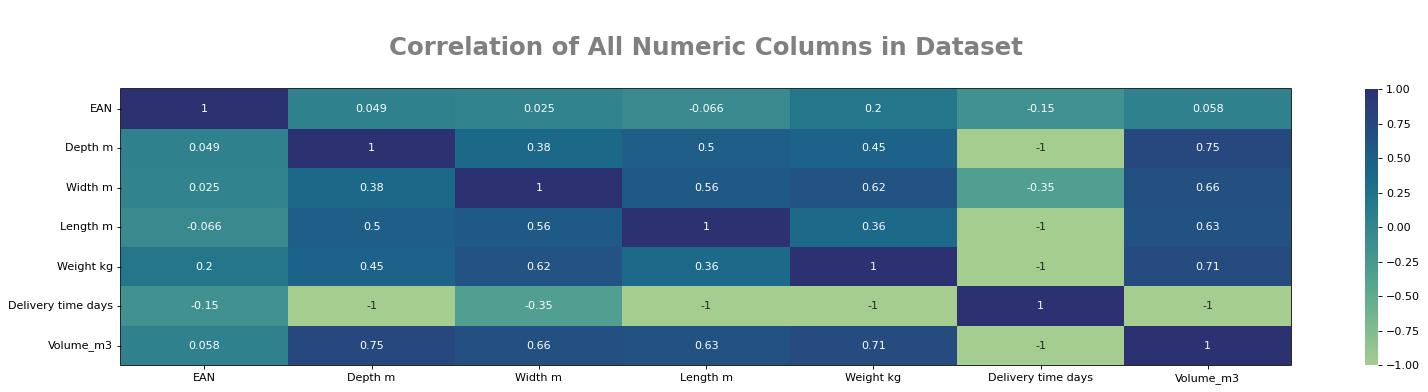

In [45]:
numericData = engineeredDf.select_dtypes(include='number')
numericData = numericData.loc[:, numericData.nunique() > 1]

fig, ax = plt.subplots(figsize=(20, 5), dpi=80)
sns.heatmap(numericData.corr(), annot=True, cmap='crest', vmin=-1, vmax=1, ax=ax )

ax.set_title('\nCorrelation of All Numeric Columns in Dataset\n', fontsize=22, color='grey', loc='center', fontname='DejaVu Sans', weight='bold')
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(1.5)

plt.tight_layout()
plt.show()

<div style="background-color: #f5f5f5; border-left: 4px solid #3498db; padding: 12px; margin-bottom: 18px; border-radius: 0 8px 8px 0;">

The table summarizes the correlation coefficients between all numeric columns in the dataset. Values close to 1 indicate a strong positive relationship, values close to -1 indicate a strong negative relationship, and values near 0 suggest no linear correlation.

- Product dimensions and weight are moderately to strongly positively correlated.
- Product volume (`Volume_m3`) is highly correlated with all three dimensions and weight.
- `Delivery time days` shows strong negative correlations with all size-related features, but this should be interpreted with caution due to the very small sample size for delivery time.
</div>

<div style="background-color: #fff4e6; border-left: 4px solid #3498db; padding: 15px; margin-bottom: 20px; border-radius: 0 8px 8px 0;">

### Frequencies and Distributions of Variables
</div>

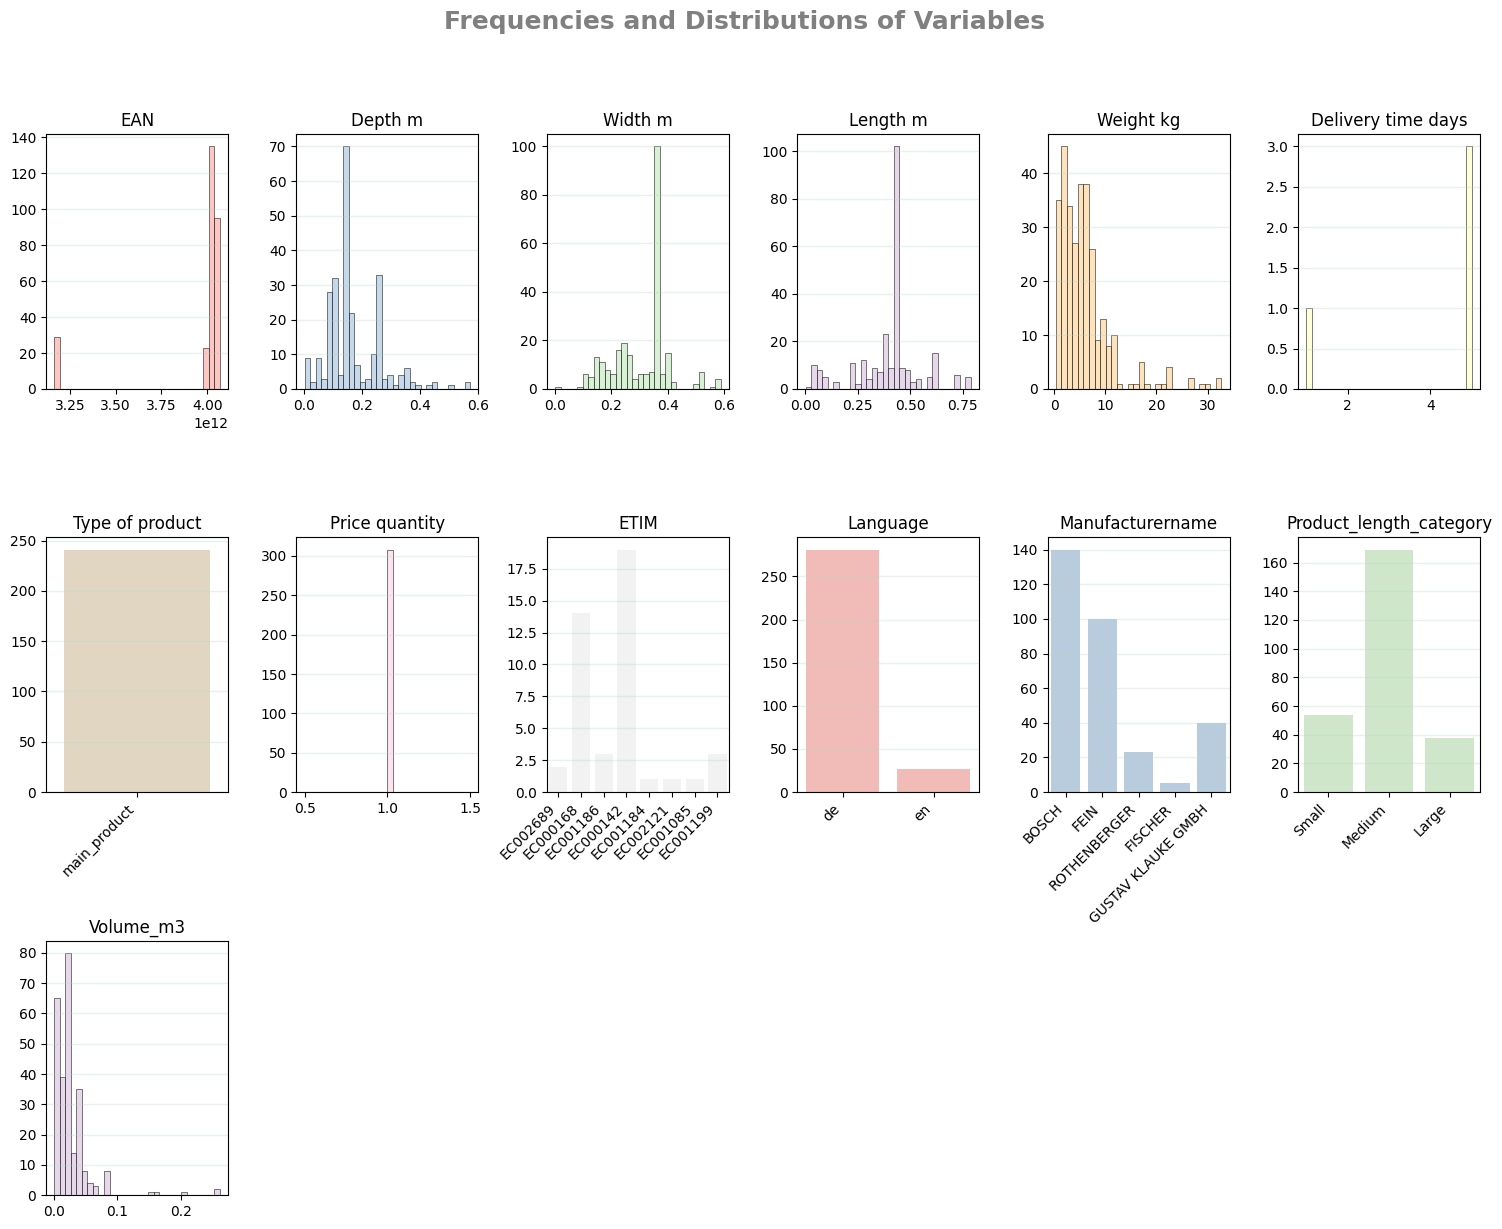

In [46]:
def plotFrequencyGridSmart(df, cols=None, nCols=6, figHeightPerRow=4, figWidthPerPlot=2.5, title=None, maxStrLen=20, maxUniqueFrac=0.5):
    if cols is None:
        cols = df.columns.tolist()

    usableCols = []
    for col in cols:
        if df[col].dtype == 'O' or pd.api.types.is_string_dtype(df[col]):
            avg_len = df[col].dropna().astype(str).str.len().mean()
            unique_frac = df[col].nunique(dropna=True) / len(df)
            if avg_len < maxStrLen and unique_frac < maxUniqueFrac:
                usableCols.append(col)
        else:
            usableCols.append(col)

    nVars = len(usableCols)
    if nVars == 0:
        print("No suitable columns to plot.")
        return

    nRows = math.ceil(nVars / nCols)
    figWidth = figWidthPerPlot * nCols
    figHeight = figHeightPerRow * nRows

    palette = sns.color_palette("Pastel1", n_colors=nVars)

    fig, axes = plt.subplots(nRows, nCols, figsize=(figWidth, figHeight), squeeze=False)
    axes = axes.flatten()

    for i, col in enumerate(usableCols):
        ax = axes[i]
        if pd.api.types.is_numeric_dtype(df[col]):
            sns.histplot(data=df, x=col, ax=ax, color=palette[i % len(palette)], bins=30, kde=False)
        else:
            sns.countplot(data=df, x=col, ax=ax, color=palette[i % len(palette)])
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

        ax.set_title(col, fontsize=12)
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)
        ax.set_facecolor((1, 1, 1, 0.9))
        ax.patch.set_edgecolor('black')

    for j in range(nVars, nRows * nCols):
        fig.delaxes(axes[j])

    if title:
        plt.suptitle(title, fontsize=18, color='grey', fontweight='bold', y=1.02)

    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

plotFrequencyGridSmart(engineeredDf, title="Frequencies and Distributions of Variables")

<div style="background-color: #f5f5f5; border-left: 4px solid #3498db; padding: 12px; margin-bottom: 18px; border-radius: 0 8px 8px 0;">

The visualizations above provide an overview of the frequencies and distributions for both numeric and categorical variables in the dataset.

### **Numeric Variables**
- **EAN:** Most products cluster around a few EAN values, indicating possible batches or product families.
- **Depth m, Width m, Length m:** These dimensions show right-skewed distributions, with most products being relatively compact and a few much larger items.
- **Weight kg:** Also right-skewed, with most products under 10 kg and a few heavy outliers.
- **Delivery time days:** Very limited variation, with most products having a delivery time of 4 or 5 days.
- **Volume_m3:** Most products have a small volume, with a long tail for larger items.

### **Categorical Variables**
- **Type of product:** Nearly all products are labeled as "main product".
- **Price quantity:** All products have a price quantity of 1, indicating unit-based pricing.
- **ETIM:** A few ETIM codes dominate, suggesting a concentration in certain product categories.
- **Language:** The majority of entries are in German (`de`), with a smaller portion in English (`en`).
- **Manufacturername:** "BOSCH" and "FEIN" are the most common manufacturers.
- **Product_length_category:** Most products fall into the "Medium" category, with fewer "Small" and "Large" items.

</div>

<div style="background-color: #fff4e6; border-left: 4px solid #3498db; padding: 15px; margin-bottom: 20px; border-radius: 0 8px 8px 0;">

### Outlier Detection and Handling
</div>

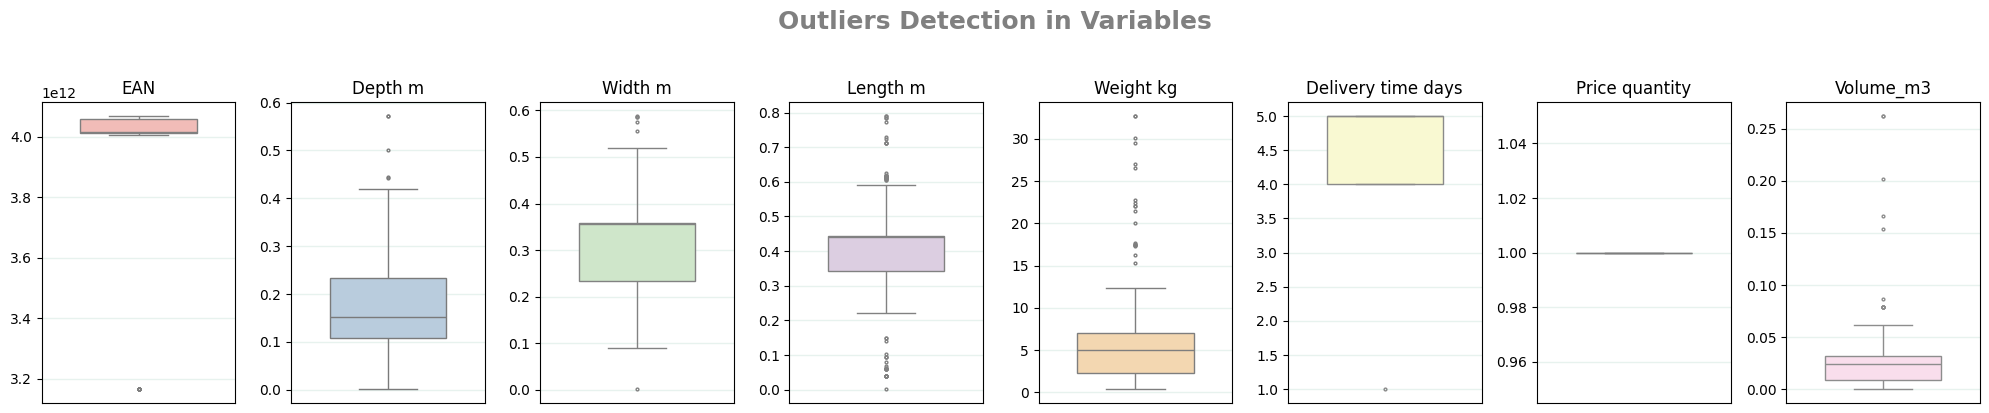

In [47]:
def plotBoxplotGrid(df, cols=None, nCols=8, figHeightPerRow=4, figWidthPerPlot=2.5, title=None):
    if cols is None:
        cols = [col for col in df.select_dtypes(include=[np.number]).columns]
    nVars = len(cols)
    nRows = math.ceil(nVars / nCols)
    figWidth = figWidthPerPlot * nCols
    figHeight = figHeightPerRow * nRows

    palette = sns.color_palette("Pastel1", n_colors=nVars)

    fig, axes = plt.subplots(nRows, nCols, figsize=(figWidth, figHeight), squeeze=False)
    axes = axes.flatten()
    for i, col in enumerate(cols):
        sns.boxplot(y=df[col], ax=axes[i], color=palette[i % len(palette)], width=0.6, fliersize=2)
        axes[i].set_title(col, fontsize=12)
        axes[i].set_ylabel("")
        #axes[i].set_yticklabels([])
        axes[i].set_xticks([])
        axes[i].grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)
        axes[i].set_facecolor((1, 1, 1, 0.9))
        axes[i].patch.set_edgecolor('black')
    
    for j in range(nVars, nRows * nCols):
        fig.delaxes(axes[j])
    if title:
        plt.suptitle(title, fontsize=18, color='grey', fontweight='bold', y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

numericCols = [col for col in engineeredDf.select_dtypes(include=[np.number]).columns]
plotBoxplotGrid(engineeredDf, cols=numericCols, nCols=8, figHeightPerRow=4, figWidthPerPlot=2.5, title="Outliers Detection in Variables")

<div style="background-color: #f5f5f5; border-left: 4px solid #3498db; padding: 12px; margin-bottom: 18px; border-radius: 0 8px 8px 0;">

During the data exploration phase, several outliers were detected in the numeric columns (e.g., product dimensions, weight, and volume). Upon closer inspection, I verified that these outlier values are legitimate and correspond to actual products in the dataset.

Since the goal of this project is **insight generation and descriptive analysis**, there is no need to remove or adjust these outliers. In fact, retaining them provides a more accurate and comprehensive view of the product assortment, capturing the full diversity of the catalog.

- All outliers are kept in the dataset.
- Insights and visualizations will be based on the complete, unfiltered data to ensure transparency and business relevance.

This approach ensures that the analysis reflects real-world product variety and supports meaningful business conclusions.

</div>

In [48]:
engineeredDf.to_csv("../data/product_catalog_cleaned.csv", index=False)

<div style="background-color: #e8f4f8; border-left: 4px solid #3498db; padding: 18px; margin-bottom: 24px; border-radius: 0 8px 8px 0;">

## <span style="color:#2980b9;">Conclusion</span>

This notebook provided a thorough, Python-based exploration and assessment of product catalog data quality, integrating product properties, descriptions, and manufacturer information. Using a combination of data cleaning, feature engineering, and descriptive analytics, I systematically evaluated the completeness and consistency of key product attributes across the catalog.

**Key achievements include:**

- Rigorous data cleaning and normalization, including the removal of fully empty columns and the handling of invalid or missing values in both categorical and numeric fields.
- Validation of unique product-manufacturer combinations, ensuring robust joins and reliable downstream analysis.
- Comprehensive descriptive statistics and visualizations, revealing the distribution, diversity, and interrelationships among product attributes.
- Feature engineering to create new analytical perspectives, such as product length categories and volumetric calculations.
- Careful investigation of outliers, confirming their legitimacy and retaining them to preserve the true diversity of the product range.
- Identification of data quality gaps, especially in fields like ETIM classification, delivery time, and certain product dimensions, highlighting areas for potential enrichment.

This analysis equips business stakeholders with actionable insights to prioritize data quality improvements, optimize product information management, and enhance the discoverability and utility of the product catalog. The workflow demonstrated here can be readily adapted for continuous monitoring and iterative enhancement of catalog data quality.

**Next steps:**  
The cleaned and enriched dataset is now ready for advanced SQL queries, dashboarding in Power BI, and further business analysis. Stakeholders can use these insights to guide targeted data enrichment, monitor catalog completeness over time, and support data-driven decision-making across product management, logistics, and marketing functions.
</div>